# Práctico 2 - Procesamiento Digital de Imágenes

In [32]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
MAT_RGB2YIQ = np.array([[0.299, 0.595716, 0.211456], 
              [0.587, -0.274453, -0.522591], 
              [0.114, -0.321263, 0.311135]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

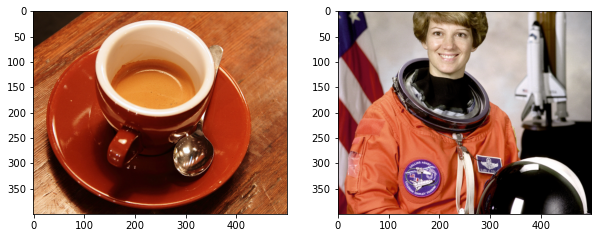

In [34]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

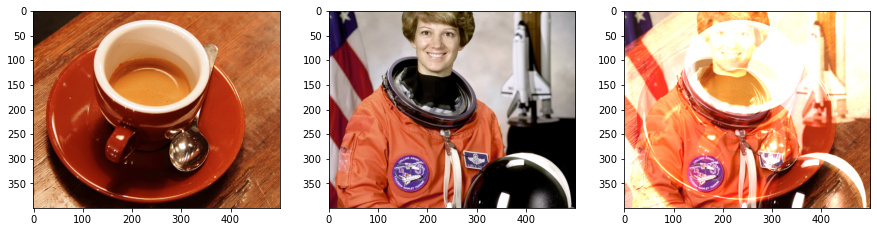

In [35]:
# Implementación de suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

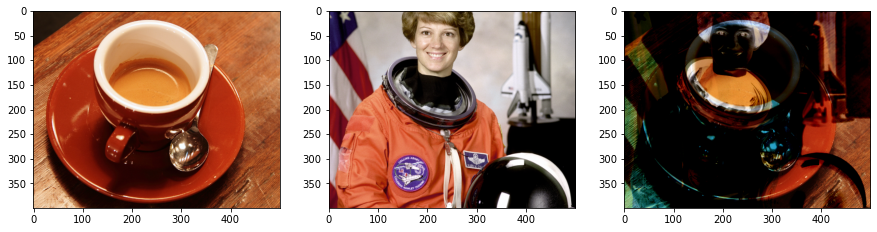

In [36]:
# Implementación de resta clampleada
img_3 = np.clip(img_1 - img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

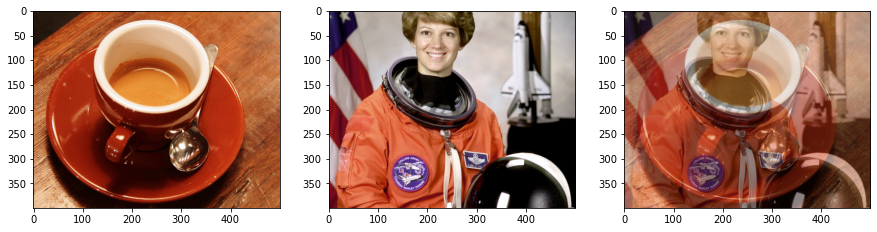

In [37]:
# Implementación de suma promediada en RGB

img_3 = (img_1 + img_2) * 0.5

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)



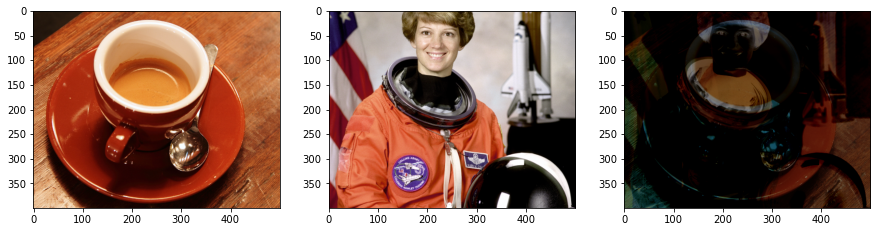

In [38]:
# Implementación de resta promediada en RGB

img_3 = np.clip((img_1 - img_2)*0.5, 0, 1)

#img_3 = (img_1 - img_2)*0.5

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


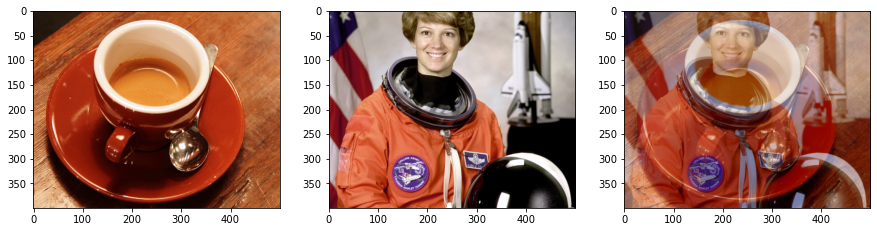

In [46]:
# Implementación de suma YIQ

#Paso de RGB ---> YIQ
img_1_yiq = rgb2yiq(img_1)
img_2_yiq = rgb2yiq(img_2)

#print(img_1_yiq)

#Suma promediada en YIQ
img_3_yiq = np.zeros(img_1.shape)
img_3_yiq[:,:,0] = ((img_1_yiq[:,:,0]) + (img_2_yiq[:,:,0]))*(0.5)
img_3_yiq[:,:,1] = ((img_1_yiq[:,:,0] * img_1_yiq[:,:,1]) + (img_2_yiq[:,:,0] * img_2_yiq[:,:,1]))/(img_1_yiq[:,:,0] + img_2_yiq[:,:,0])
img_3_yiq[:,:,2] = ((img_1_yiq[:,:,0] * img_1_yiq[:,:,2]) + (img_2_yiq[:,:,0] * img_2_yiq[:,:,2]))/(img_1_yiq[:,:,0] + img_2_yiq[:,:,0])


#vuelgo a rgb
img_3_rgb = yiq2rgb(img_3_yiq)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3_rgb)




In [57]:
import time

In [58]:
img_1.shape

(400, 500, 3)

In [59]:
def if_lifghter(img_1, img_2)

img_1_y = rgb2yiq(img_1)[:,:,0]
img_2_y = rgb2yiq(img_2)[:,:,0]

rows, cols, channels = img_1.shape

img_3 = np.zeros((rows, cols, channels))

In [67]:
mask = img_1_y > img_2_y
img_3[mask] = img_1[mask]

mask = img_2_y >= img_1_y
img_3[mask] = img_1[mask]

In [65]:
t1 = time.perf_counter() 

for r in range(rows):
        for c in range(cols):
            if img_1_y[r,c] > img_2_y[r,c]:
                img_3[r,c,:] = img_1[r,c,:]
            else:
                img_3[r,c,:] = img_2[r,c,:]
                
t2 = time.perf_counter()                
print(t2-t1)
                
              

2.2834896000022127


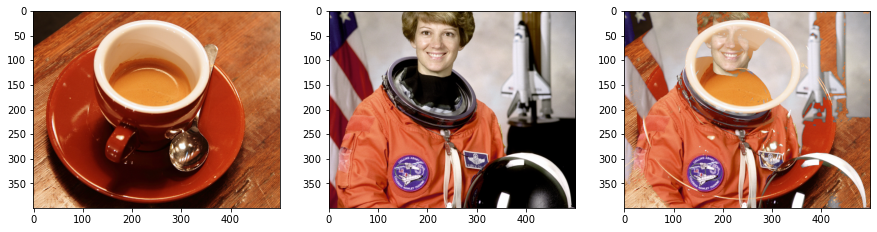

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)  

In [ ]:
# Ayudita para implementar if-lighther e if-darker:
# A continuación creo dos arreglos x e y del mismo tamaño, donde x tiene los valores que se muestran e y son todos ceros
# Luego, al arreglo "y" le asigno 1 en los lugares donde x es estrictamente mayor a 2

x = np.array([[1,2,1,2],
              [1,2,3,2],
              [2,3,3,1],
              [1,2,3,2]])

y = np.zeros((4,4))

print(y)  # Muestro el valor de y antes de ser modificado

y[x > 2] = 1

print('')
print(y)  # Muestro el valor de y luego de ser modificado

In [56]:
y = np.array([1,2,3,4])
z = np.array([9,8,7,6])
x = np.array([True,True,False,True])

y[x] = z[x]
y

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
x > 2